In [84]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from matplotlib import pyplot

import seaborn as sns

Пусть 

$nif$ - количество if-операторов, 

$ngl$ - количество глобальных переменных, 

$nsub$ - количество вызываемых подпрограмм,

$nkom$ - количество команд, 

$nssl$ - количество циклов, 

$H$ - коэффициент сложности(экспертная оценка).

In [85]:
nif = np.array([17., 8., 16., 16., 12., 12., 9., 11., 11., 5., 6., 4., 13., 4.])
ngl = np.array([33., 36., 20., 16., 13., 7., 11., 10., 8., 3., 0., 3., 0., 3.])
nsub = np.array([13., 8., 5., 9., 2., 3., 2., 2., 2., 3., 0., 3., 0., 3.])
nkom = np.array([227., 177., 457., 369., 176., 424., 105., 236., 229., 231., 270., 82., 186., 95.])
nssl = np.array([0., 0., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0.])
H = np.array([7.051, 4.501, 3.860, 3.623, 3.198, 2.601, 2.582, 2.205, 2.010, 1.913, 1.683, 1.532, 1.489, 1.022])

Составим из наших входных переменных всевозможные метрики:

$alpha = ngl*nkom* \cfrac{nsub+1}{6}$ - количественная метрика

$beta = nssl + nif$ - метрика Джилба

$gamma = nif + 1$ - метрика Мак-Кейба

$omega = \cfrac{nkom}{6}$ - количественная метрика

Тогда итоговая формула будет выглядеть:

$Hm = R_0*alpha^{k_0} + R_1*beta^{k_1} + R_2*gamma^{k_2} + R_3*omega^{k_3}$

Наша задача заключается в подборе коэффициентов $R_i$ и степеней $k_i$.
Воспользуемся линейной регрессией для нахождения $R_i$ и поиском по сетке для нахождения $k_i$.

In [86]:
alpha_list = ngl*nkom*(nsub+1)/6.

In [87]:
beta_list = nssl + nif

In [88]:
gamma_list = nif + 1.

In [89]:
omega_list = nkom / 6.

In [90]:
alpha_list = np.expand_dims(alpha_list, axis=1)
beta_list = np.expand_dims(beta_list, axis=1)
gamma_list = np.expand_dims(gamma_list, axis=1)
omega_list = np.expand_dims(omega_list, axis=1)
X = np.concatenate((alpha_list, beta_list), axis=1)
X = np.concatenate((X, gamma_list), axis=1)
X = np.concatenate((X, omega_list), axis=1)

In [91]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, H)
reg.score(X, H)

0.9312855932973411

In [92]:
reg.coef_

array([ 2.70928797e-04,  4.84508265e-01, -4.39519932e-01, -9.11486224e-03])

Получились коэффициенты:

R_0 = 2.70928797e-04

R_1 = 4.84508265e-01

R_2 = -4.39519932e-01

R_3 = -9.11486224e-03

In [93]:
reg.intercept_
reg.predict(X[0].reshape(1,-1))

array([6.72965501])

In [94]:
for i in range(len(H)):
    print(H[i], reg.predict(X[i].reshape(1,-1)))

7.051 [6.72965501]
4.501 [4.25469021]
3.86 [4.07598839]
3.623 [4.39932319]
3.198 [3.12558431]
2.601 [2.00595538]
2.582 [1.97598083]
2.205 [2.03018426]
2.01 [1.96929307]
1.913 [2.05783138]
1.683 [1.43389574]
1.532 [1.67395041]
1.489 [1.87642213]
1.022 [1.66124569]


In [95]:
X.shape

(14, 4)

In [96]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

In [97]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, H)
reg.score(X, H)

0.9312855932973411

In [98]:
for i in range(len(H)):
    print(H[i], reg.predict(X[i].reshape(1,-1)))

7.051 [6.72965501]
4.501 [4.25469021]
3.86 [4.07598839]
3.623 [4.39932319]
3.198 [3.12558431]
2.601 [2.00595538]
2.582 [1.97598083]
2.205 [2.03018426]
2.01 [1.96929307]
1.913 [2.05783138]
1.683 [1.43389574]
1.532 [1.67395041]
1.489 [1.87642213]
1.022 [1.66124569]


In [99]:
X.shape

(14, 4)

Получили коэффициенты:

$R_0 = 2.70928797e-04$

$R_1 = 4.84508265e-01$

$R_2 = -4.39519932e-01$

$R_3 = -9.11486224e-03$

In [100]:
R_0 = 2.70928797e-04
R_1 = 4.84508265e-01
R_2 = -4.39519932e-01
R_3 = -9.11486224e-03

In [101]:
t =R_0*alpha_list[0]+R_1*beta_list[0]+R_2*gamma_list[0]+R_3*omega_list[0] +2
a = R_0*alpha_list[1]+R_1*beta_list[1]+R_2*gamma_list[1]+R_3*omega_list[1]+2
b = R_0*alpha_list[2]+R_1*beta_list[2]+R_2*gamma_list[2]+R_3*omega_list[2]+2
c = R_0*alpha_list[3]+R_1*beta_list[3]+R_2*gamma_list[3]+R_3*omega_list[3]+2
d = R_0*alpha_list[4]+R_1*beta_list[4]+R_2*gamma_list[4]+R_3*omega_list[4]+2
e = R_0*alpha_list[5]+R_1*beta_list[5]+R_2*gamma_list[5]+R_3*omega_list[5]+2
f = R_0*alpha_list[6]+R_1*beta_list[6]+R_2*gamma_list[6]+R_3*omega_list[6]+2
g = R_0*alpha_list[7]+R_1*beta_list[7]+R_2*gamma_list[7]+R_3*omega_list[7]+2
h = R_0*alpha_list[8]+R_1*beta_list[8]+R_2*gamma_list[8]+R_3*omega_list[8]+2
k = R_0*alpha_list[9]+R_1*beta_list[9]+R_2*gamma_list[9]+R_3*omega_list[9]+2
n = R_0*alpha_list[10]+R_1*beta_list[10]+R_2*gamma_list[10]+R_3*omega_list[10]+2
p = R_0*alpha_list[11]+R_1*beta_list[11]+R_2*gamma_list[11]+R_3*omega_list[11]+2
o = R_0*alpha_list[12]+R_1*beta_list[12]+R_2*gamma_list[12]+R_3*omega_list[12]+2
r = R_0*alpha_list[13]+R_1*beta_list[13]+R_2*gamma_list[13]+R_3*omega_list[13]+2

Hm = [t, a, b, c, d, e, f, g, h, k, n, p, o, r]

Выведем полученные значения коэффициентов сложности:

In [102]:
Hm

[array([6.71600055]),
 array([4.24103574]),
 array([4.06233393]),
 array([4.38566873]),
 array([3.11192985]),
 array([1.99230091]),
 array([1.96232636]),
 array([2.0165298]),
 array([1.9556386]),
 array([2.04417691]),
 array([1.42024127]),
 array([1.66029594]),
 array([1.86276767]),
 array([1.64759122])]

In [103]:
H

array([7.051, 4.501, 3.86 , 3.623, 3.198, 2.601, 2.582, 2.205, 2.01 ,
       1.913, 1.683, 1.532, 1.489, 1.022])

Построим график зависимости предсказанного коэффицента сложности от экспертной оценки:

C:\Users\babus\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


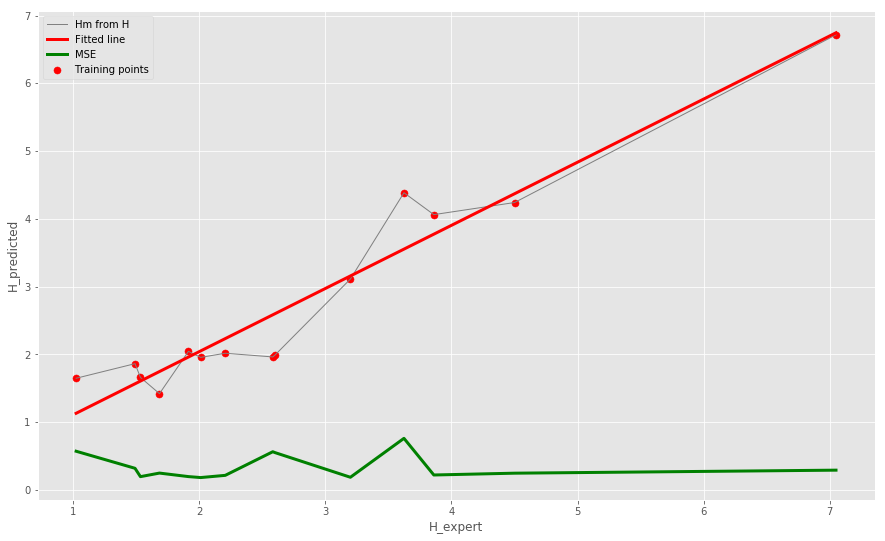

In [116]:
fig, ax = plt.subplots(figsize=[15, 9])

plt.scatter(H, Hm, color = 'red',s=50, marker='o', label="Training points")
plt.plot(H, Hm, 'gray', lw=1, label = 'Hm from H')


A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]
y = np.zeros(len(Hm))
for i in range(len(Hm)):
    y[i] = (Hm[i][0])
x = H
plt.plot(x, m*x + c, 'red', lw=3, label='Fitted line')
plt.plot(x, (x - y)**2+ c, 'green', lw=3, label='MSE')


plt.legend(loc='best')
plt.xlabel('H_expert')
plt.ylabel('H_predicted')
ax.grid(True)

C:\Users\babus\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


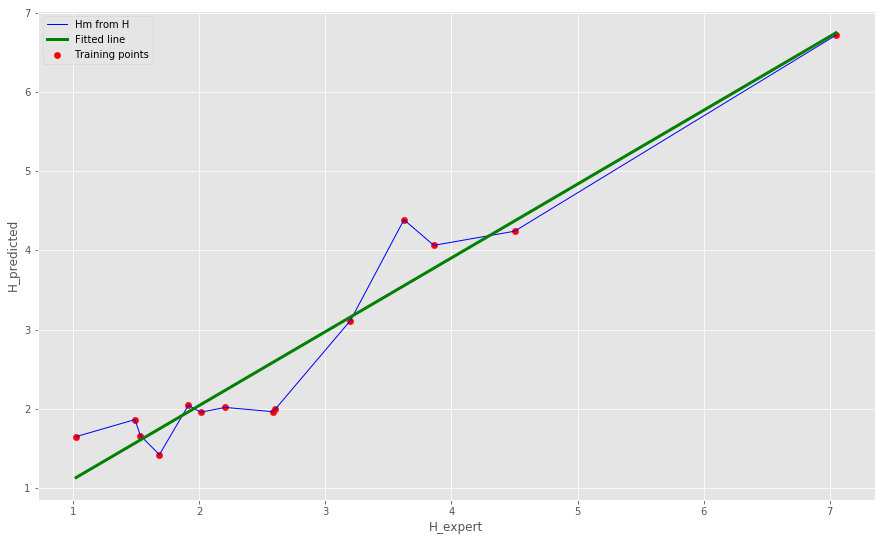

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=[15, 9])

plt.scatter(H, Hm, color = 'red',s=40, marker='o', label="Training points")
plt.plot(H, Hm, 'blue', lw=1, label = 'Hm from H')


A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]
y = np.zeros(len(Hm))
for i in range(len(Hm)):
    y[i] = (Hm[i][0])
x = H

plt.plot(x, m*x + c, 'g', lw=3, label='Fitted line')


plt.legend(loc='best')
plt.xlabel('H_expert')
plt.ylabel('H_predicted')
ax.grid(True)

C:\Users\babus\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


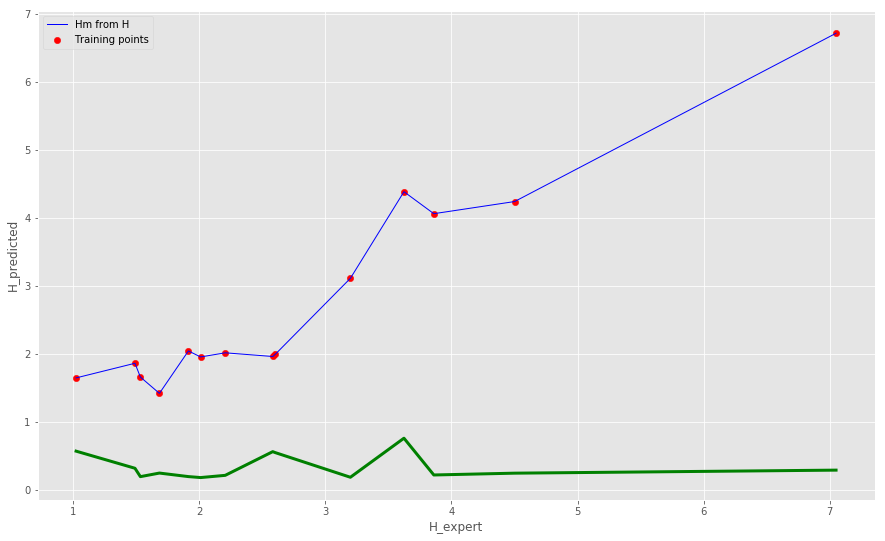

In [115]:
fig, ax = plt.subplots(figsize=[15, 9])

plt.scatter(H, Hm, color = 'red',s=40, marker='o', label="Training points")
plt.plot(H, Hm, 'blue', lw=1, label = 'Hm from H')


A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0]
y = np.zeros(len(Hm))
for i in range(len(Hm)):
    y[i] = (Hm[i][0])
x = H

plt.plot(x, (x - y)**2+ c, 'g', lw=3, label='')


plt.legend(loc='best')
plt.xlabel('H_expert')
plt.ylabel('H_predicted')
ax.grid(True)

In [105]:
y

array([6.71600055, 4.24103574, 4.06233393, 4.38566873, 3.11192985,
       1.99230091, 1.96232636, 2.0165298 , 1.9556386 , 2.04417691,
       1.42024127, 1.66029594, 1.86276767, 1.64759122])

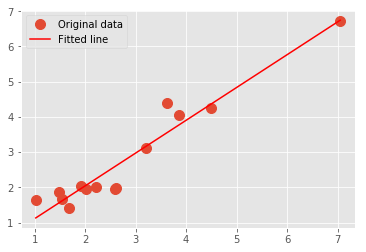

In [106]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

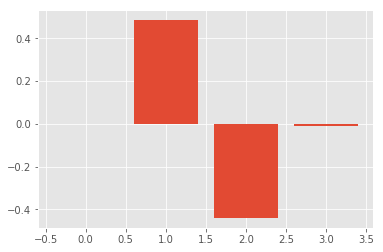

In [118]:
importance = reg.coef_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Далее я попыталась улучшить модель с помощью случайного леса, но  безуспешно 

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(random_state=0)
regr.fit(X, H)

C:\Users\babus\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [109]:
for i in range(len(H)):
    print(H[i], regr.predict(X[i].reshape(1,-1)))

7.051 [6.7082]
4.501 [4.0418]
3.86 [4.4912]
3.623 [4.3323]
3.198 [2.9994]
2.601 [2.5023]
2.582 [2.2686]
2.205 [2.3043]
2.01 [2.1075]
1.913 [1.8239]
1.683 [1.6478]
1.532 [1.3747]
1.489 [1.9545]
1.022 [1.2217]
